In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load your dataset
df = pd.read_excel("C:/Users/TomiNordi2m/OneDrive - i2m Unternehmensentwicklung GmbH/Documents/Backup Python/2024.10.21 GIANTS project_ User and stakeholder needs survey (Responses).xlsx")

In [2]:
total_responses = len(df)
print(f"Total number of responses: {total_responses}")

Total number of responses: 323


## Subgroup Filtering Definition

In [3]:

# Define the age categories for retirees
retiree_ages = ['60-78', '>78']

# Filter the dataframe for respondents within the retiree 2. Age
df_retiree = df[df['2. Age'].isin(retiree_ages)]

# Define keywords related to work for primary and secondary use filtering
work_related_keywords = ['work', 'commuting']

# Function to check if any of the work-related keywords are present
def not_work_related(usage):
    if pd.isnull(usage):
        return True  # Keep null values (assuming these could be retirees too)
    usage = str(usage)  # Convert to string to avoid errors with numeric entries
    return not any(keyword in usage.lower() for keyword in work_related_keywords)

# Apply the filtering on both primary and secondary usage
df_retiree = df_retiree[df_retiree['16. How do you generally use your primary mode of transportation? (Multiple answers allowed.)'].apply(not_work_related)]
df_retiree = df_retiree[df_retiree['21. How do you generally use your secondary mode of transportation? (Multiple answers allowed.)'].apply(not_work_related)]

# Get the count of how many people fulfill the retiree criteria
retiree_count = len(df_retiree)

# Output the count
print(f"Number of respondents who fulfill the retiree criteria: {retiree_count}")


Number of respondents who fulfill the retiree criteria: 30


In [4]:
# Define the 2. Age for students
student_ages = ['18-29']  # Adjust based on the dataset categories

# Define the low-income ranges based on the income column
low_income_ranges = [
    '0 - 2,500€', 
    '2,500 - 5,000€', 
    '5,000 - 10,000€', 
    '10,000 - 25,000€'
]

# Filter the dataframe for respondents within the student 2. Age
df_student = df[df['2. Age'].isin(student_ages)]

# Further filter for respondents within the low-income ranges
df_student = df_student[df_student['9.  Estimated annual household (family) income in 2023 in Euros (€/EUR)? (Link to EU Currency Converter)'].isin(low_income_ranges)]

# Get the count of how many people fulfill the student criteria
student_count = len(df_student)

# Output the count
print(f"Number of respondents who fulfill the student criteria: {student_count}")

# The resulting filtered dataframe `df_student` will now contain only students




Number of respondents who fulfill the student criteria: 22


In [5]:
# Combine the two columns to calculate total household size
df['Total Household Size'] = (
    pd.to_numeric(df['8. How many people  / family members live in your household? (for safety related questions) [Adults (18 and older)]'], errors='coerce') +
    pd.to_numeric(df['8. How many people  / family members live in your household? (for safety related questions) [Kids (6-17)]'], errors='coerce')
)

# Filter for families with total household size >= 2
df_family = df[df['Total Household Size'] >= 2]

# Further filter for households with at least one child
df_family = df_family[df['8. How many people  / family members live in your household? (for safety related questions) [Kids (6-17)]'] > 0]

# Output the count of families with kids
family_with_kids_count = len(df_family)
print(f"Number of families with kids: {family_with_kids_count}")



Number of families with kids: 91


C:\Users\TomiNordi2m\AppData\Local\Temp\ipykernel_9564\1175133733.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_family = df_family[df['8. How many people  / family members live in your household? (for safety related questions) [Kids (6-17)]'] > 0]


In [40]:
# Calculate total household size
df['Total Household Size'] = (
    pd.to_numeric(df['8. How many people  / family members live in your household? (for safety related questions) [Adults (18 and older)]'], errors='coerce').fillna(0) +
    pd.to_numeric(df['8. How many people  / family members live in your household? (for safety related questions) [Kids (6-17)]'], errors='coerce').fillna(0)
)

# Define the age ranges to include
single_person_ages = ['30-44', '45-65']  # Adjust based on the actual categories in your dataset

# Filter for single-person households
df_single_person = df[df['Total Household Size'] <= 2]

# Further filter for respondents within the specified 2. Ages
df_single_person = df_single_person[df_single_person['2. Age'].isin(single_person_ages)]

# Further filter for households with no children
df_single_person = df_single_person[(df['8. How many people  / family members live in your household? (for safety related questions) [Kids (6-17)]'] == 0) | (df['8. How many people  / family members live in your household? (for safety related questions) [Kids (6-17)]'].isna())]


# Output the count of single-person households within the 2. Ages
single_person_age_filtered_count = len(df_single_person)
print(f"Number of single-person households aged 30-44 or 45-65: {single_person_age_filtered_count}")


Number of single-person households aged 30-44 or 45-65: 63


C:\Users\TomiNordi2m\AppData\Local\Temp\ipykernel_9564\1225874764.py:17: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [7]:
# Filter respondents whose trip purpose involves work-related usage
df_service_providers = df[
    df['16. How do you generally use your primary mode of transportation? (Multiple answers allowed.)'].isin([
        'Vehicle is my work tool (for passenger transport)',
        'Vehicle is my work tool (for cargo/delivery)'
    ])
]

# Count the number of service providers identified
service_provider_count = len(df_service_providers)
print(f"Number of service providers identified: {service_provider_count}")


Number of service providers identified: 6


# Choose Persona Subgroup below

In [8]:
df = df

In [9]:
# Sample data for gender distribution
gender_counts = df['1. Gender'].value_counts()

# Create a condensed pie chart with adjusted width and height
fig = px.pie(
    names=gender_counts.index, 
    values=gender_counts.values, 
    title='Gender Distribution',
    color_discrete_sequence=px.colors.qualitative.Safe,  # Built-in color sequence
    width=750,  
    height=750
)

# Aesthetic improvements
fig.update_layout(
    title_text='Gender Distribution',  # Title customization
    title_x=0.5,  # Center title
    font=dict(
        family="Arial, sans-serif",  # Clean font
        size=18,  # Set readable font size
        color="black"  # Set font color
    ),
    legend_title_text='Gender',  # Customize legend title
    margin=dict(t=50, b=50, l=50, r=50),  # Adjust margins
)

fig.update_traces(
    hoverinfo='label+percent',  # Hover info customization
    textinfo='value+percent',   # Show value and percent in the chart
    textfont_size=16            # Adjust label font size
)
total_responses = len(df)
print(f"Total number of responses: {total_responses}")

Total number of responses: 323


In [10]:
# Exclude rows with explicit numeric ages and keep only age ranges
df_filtered = df[df['2. Age'].astype(str).str.contains('-|>')]

# Count occurrences of each age range
age_range_counts = df_filtered['2. Age'].value_counts()

# Define the custom order for age ranges
age_order = ['18-29', '30-44', '45-59', '60-78', '>78']

# Convert to a DataFrame for sorting and ordering
df_age = pd.DataFrame({'Age Range': age_range_counts.index, 'Count': age_range_counts.values})

# Ensure all age ranges in `age_order` are included, even with 0 count
for age in age_order:
    if age not in df_age['Age Range'].values:
        df_age = pd.concat([df_age, pd.DataFrame({'Age Range': [age], 'Count': [0]})])

# Sort by custom order
df_age['Age Range'] = pd.Categorical(df_age['Age Range'], categories=age_order, ordered=True)
df_age = df_age.sort_values('Age Range')

# Create the pie chart
fig = px.pie(
    df_age,
    names='Age Range',
    values='Count',
    title='Age Distribution',
    color_discrete_sequence=px.colors.qualitative.Safe,
    width=750,
    height=750
)

# Customize layout
fig.update_layout(
    title_text='Age Distribution',
    title_x=0.5,
    font=dict(
        family="Arial, sans-serif",
        size=18,
        color="black"
    ),
    legend_title_text='Age Range',
    margin=dict(t=50, b=50, l=50, r=50)
)

fig.update_traces(
    hoverinfo='label+percent',
    textinfo='percent',
    textfont_size=16,
    sort=False
)

# Show the plot
fig.show()



In [11]:

# Drop null values from the gender column
df_filtered_gender = df['1. Gender'].dropna()

# Get the gender distribution including all unique categories
gender_counts = df_filtered_gender.value_counts()

# Define the custom order based on all unique responses
gender_order = ['Male', 'Female', 'Non-Binary', 'Prefer not to answer']

# Convert to a DataFrame for sorting and ordering
df_gender = pd.DataFrame({'Gender': gender_counts.index, 'Count': gender_counts.values})

# Ensure all gender categories are included, even with 0 count
for gender in gender_order:
    if gender not in df_gender['Gender'].values:
        df_gender = pd.concat([df_gender, pd.DataFrame({'Gender': [gender], 'Count': [0]})], ignore_index=True)

# Sort by custom order
df_gender['Gender'] = pd.Categorical(df_gender['Gender'], categories=gender_order, ordered=True)
df_gender = df_gender.sort_values('Gender')

# Create the pie chart
fig = px.pie(
    df_gender,
    names='Gender',
    values='Count',
    title='Gender Distribution',
    color_discrete_sequence=px.colors.qualitative.Safe,
    width=750,
    height=750
)

# Customize layout
fig.update_layout(
    title_text='Gender Distribution',
    title_x=0.5,
    font=dict(
        family="Arial, sans-serif",
        size=18,
        color="black"
    ),
    legend_title_text='Gender',
    margin=dict(t=50, b=50, l=50, r=50)
)

fig.update_traces(
    hoverinfo='label+percent',
    textinfo='percent',
    textfont_size=16,
    sort=False
)

# Display the plot
fig.show()


In [12]:
# Convert relevant columns to numeric, forcing errors to NaN (non-numeric values will be replaced with NaN)
df['Adults'] = pd.to_numeric(df['8. How many people  / family members live in your household? (for safety related questions) [Adults (18 and older)]'], errors='coerce')
df['Kids'] = pd.to_numeric(df['8. How many people  / family members live in your household? (for safety related questions) [Kids (6-17)]'], errors='coerce')
df['Toddlers'] = pd.to_numeric(df['8. How many people  / family members live in your household? (for safety related questions) [Toddlers (1-5)]'], errors='coerce')
df['Infants'] = pd.to_numeric(df['8. How many people  / family members live in your household? (for safety related questions) [Infants (younger than 1)]'], errors='coerce')

# Replace NaN values with 0
df.fillna(0, inplace=True)

# Calculate the total number of people per household
df['Total Household Size'] = df[['Adults', 'Kids', 'Toddlers', 'Infants']].sum(axis=1)

# Define custom order for household sizes
household_order = ['1', '2', '3-5', '6+']

# Bin the total household size into categories
bins = [0, 1, 2, 5, float('inf')]  # Define bins for grouping
labels = ['1', '2', '3-5', '6+']  # Corresponding labels
df['Household Size Category'] = pd.cut(df['Total Household Size'], bins=bins, labels=labels, right=True)

# Count occurrences in each household size category
household_size_counts = df['Household Size Category'].value_counts()

# Convert to a DataFrame for sorting
df_household = pd.DataFrame({'Household Size': household_size_counts.index, 'Count': household_size_counts.values})

# Ensure all categories in the custom order are included, even with 0 count
for size in household_order:
    if size not in df_household['Household Size'].values:
        df_household = pd.concat([df_household, pd.DataFrame({'Household Size': [size], 'Count': [0]})])

# Sort by custom order
df_household['Household Size'] = pd.Categorical(df_household['Household Size'], categories=household_order, ordered=True)
df_household = df_household.sort_values('Household Size')

# Create the pie chart
fig = px.pie(
    df_household,
    names='Household Size',
    values='Count',
    title='Total Household Size Distribution',
    color_discrete_sequence=px.colors.qualitative.Safe,
    width=750,
    height=750
)

# Customize layout
fig.update_layout(
    title_text='Total Household Size Distribution',
    title_x=0.5,
    font=dict(
        family="Arial, sans-serif",
        size=18,
        color="black"
    ),
    legend_title_text='Household Size',
    margin=dict(t=50, b=50, l=50, r=50)
)

fig.update_traces(
    hoverinfo='label+percent',
    textinfo='percent',
    textfont_size=16,
    sort=False
)

# Show the plot
fig.show()

# Print total number of responses
total_responses = len(df)
print(f"Total number of responses: {total_responses}")


Total number of responses: 323


In [13]:
total_responses = len(df)
print(f"Total number of responses: {total_responses}")

Total number of responses: 323


In [14]:


# List of rural cities as provided by you
rural_cities = [
    "Kiruna", "Witzenhausen", "Vorchten", "Kingman", "Crymych", "Zittau",
    "South Harting, Petersfield", "Hope Town, Elbow Cay, Abaco"
]

# Normalize and classify each city
def classify_city(city):
    city = str(city)  # Convert city to string
    if pd.isna(city) or city.strip().lower() in ["n/a", "", "public authority", "i am a private individual"]:
        return "No Response"
    
    # Normalize city name by stripping spaces and using title case
    city_normalized = city.strip().title()
    if city_normalized in [c.title() for c in rural_cities]:
        return "Rural"
    else:
        return "Urban/Suburban"

# Apply the classification function to the city column
df['City Type'] = df['4. City (*If you are completing this survey as a fleet operator, public authority, etc. the primary city of your operations / city you represent)'].apply(classify_city)

# Count occurrences of each category (Urban/Suburban, Rural, No Response)
city_type_counts = df['City Type'].value_counts()

# Create a pie chart based on the classification
fig = px.pie(
    names=city_type_counts.index,
    values=city_type_counts.values,
    title='Urban/Suburban vs Rural vs No Response City Distribution',
    color_discrete_sequence=px.colors.qualitative.Safe,  # Preferred color palette
    width=750,
    height=750
)

# Apply the preferred layout settings
fig.update_layout(
    title_text='Urban/Suburban vs Rural',
    title_x=0.5,
    font=dict(
        family="Arial, sans-serif",
        size=18,
        color="black"
    ),
    legend_title_text='City Type',
    margin=dict(t=50, b=50, l=50, r=50)
)

fig.update_traces(
    hoverinfo='label+percent',
    textinfo='percent',
    textfont_size=16
)

# Display the plot
fig.show()

# Display total number of responses to verify that no rows were dropped
total_responses = df.shape[0]
print(f"Total number of responses: {total_responses}")


Total number of responses: 323


In [15]:
import pandas as pd
import plotly.express as px

# Updated mapping of countries to continents
country_to_continent = {
    'USA': 'North America',
    'United States': 'North America',
    'Canada': 'North America',
    'Mexico': 'North America',
    'Brazil': 'South America',
    'Argentina': 'South America',
    'UK': 'Europe',
    'United Kingdom': 'Europe',
    'Germany': 'Europe',
    'France': 'Europe',
    'Belgium': 'Europe',
    'Netherlands': 'Europe',
    'Austria': 'Europe',
    'Sweden': 'Europe',
    'Portugal': 'Europe',
    'Spain': 'Europe',
    'Italy': 'Europe',
    'Switzerland': 'Europe',
    'Czechia': 'Europe',
    'Estonia': 'Europe',
    'Slovenia': 'Europe',
    'Greece': 'Europe',
    'Malta': 'Europe',
    'Ireland': 'Europe',
    'Bosnia and Herzegovina': 'Europe',
    'Montenegro': 'Europe',
    'Croatia': 'Europe',
    'Finland': 'Europe',
    'Slovakia': 'Europe',
    'Philippines': 'Asia',
    'India': 'Asia',
    'China': 'Asia',
    'Nepal': 'Asia',
    'Thailand': 'Asia',
    'Malaysia': 'Asia',
    'Cambodia': 'Asia',
    'Japan': 'Asia',
    'Laos': 'Asia',
    'Australia': 'Oceania',
    'New Zealand': 'Oceania',
    'South Africa': 'Africa',
    'Kenya': 'Africa',
    'Mauritius': 'Africa',
    'Morocco': 'Africa',
    'Egypt': 'Africa',
    'The Bahamas': 'North America',
    'Indonesia': 'Asia',
    'Hungary': 'Europe'
}

# Add a new column for continent based on the mapping
df['Continent'] = df['3. Country'].map(country_to_continent)

# Count the number of respondents per continent
continent_counts = df['Continent'].value_counts()

# Add percentages dynamically
total_responses = sum(continent_counts.values)
percentages = [(value / total_responses) * 100 for value in continent_counts.values]  # Calculate unique percentages

# Create a DataFrame with continent counts and percentages
df_continent = pd.DataFrame({
    'Continent': continent_counts.index,
    'Count': continent_counts.values
})
df_continent['Percentage'] = (df_continent['Count'] / df_continent['Count'].sum()) * 100

# Create the bar plot
fig = px.bar(
    df_continent,
    x='Continent',
    y='Count',
    title='Respondents by Continent',
    text='Percentage',  # Use the percentage column for text
    color='Continent',  # Assign color to continents
    color_discrete_sequence=px.colors.qualitative.Safe,  # Use Safe palette
    width=1400,
    height=600
)

# Format percentages to two decimal places in the text
fig.update_traces(
    texttemplate='%{text:.2f}%',  # Format the percentage text
)

# Update layout with consistent formatting and a custom legend title
fig.update_layout(
    plot_bgcolor='white',
    title_x=0.5,  # Center title
    font=dict(
        family="Arial, sans-serif",
        size=18,
        color="black"
    ),
    legend_title_text='Continent',  # Set legend title explicitly
    margin=dict(t=50, b=50, l=50, r=50)  # Adjust margins
)

# Display the plot
fig.show()

# Print total responses for context
total_responses = df_continent['Count'].sum()
print(f"Total number of responses: {total_responses}")



Total number of responses: 323


In [16]:
import plotly.express as px
import pandas as pd

# Prepare the data for continents
# Count the respondents by continent
continent_counts = df['Continent'].value_counts().reset_index()
continent_counts.columns = ['Continent', 'Respondents']

# Calculate percentages
total_respondents = continent_counts['Respondents'].sum()
continent_counts['Percentage'] = (continent_counts['Respondents'] / total_respondents) * 100

# Map continents to approximate central latitude and longitude for placing markers
continent_coordinates = {
    'Africa': {'lat': 0, 'lon': 20},
    'Asia': {'lat': 34, 'lon': 100},
    'Europe': {'lat': 54, 'lon': 15},
    'North America': {'lat': 37, 'lon': -95},
    'South America': {'lat': -15, 'lon': -60},
    'Oceania': {'lat': -25, 'lon': 133},
}

# Add lat/lon to the continent data
continent_counts['Latitude'] = continent_counts['Continent'].map(lambda x: continent_coordinates[x]['lat'])
continent_counts['Longitude'] = continent_counts['Continent'].map(lambda x: continent_coordinates[x]['lon'])

# Create the scatter_geo map
fig = px.scatter_geo(
    continent_counts,
    lat='Latitude',
    lon='Longitude',
    text='Continent',  # Display continent names
    size='Respondents',  # Circle size by number of respondents
    hover_name='Continent',  # Name on hover
    hover_data={'Respondents': True, 'Percentage': ':.2f'},  # Show respondents and percentage
    title='Respondents by Continent (with Percentages)',
    projection="natural earth",
    width=1200,  # Wider map for better visibility
    height=800
)

# Add percentages as text on the map with larger font size
fig.update_traces(
    text=continent_counts.apply(lambda row: f"{row['Continent']}: {row['Percentage']:.2f}%", axis=1),
    textposition="middle center",
    marker=dict(
        sizemode="diameter",  # Ensure marker sizes scale with respondents
        sizeref=2,  # Adjust size scaling for larger bubbles
    )
)

# Update layout for aesthetics
fig.update_layout(
    title_x=0.5,
    font=dict(
        family="Arial, sans-serif",
        size=18,  # Larger overall font size
        color="black"
    ),
    plot_bgcolor="white",
    showlegend=False,  # Turn off the legend
)

# Display the map
fig.show()



In [17]:
import plotly.express as px

# Define the custom order for population size categories
population_order = [
    '> 2.000.000', 
    'Between 500.000 and 2.000.000', 
    'Between 150.000 and 500.000', 
    'Between 50.000 and 150.000', 
    'Between 25.000 and 50.000',
    'Between 10.000 and 25.000', 
    'Between 2.000 and 10.000', 
    '< 2.000'
]


# List of responses for population size from the provided data
population_sizes = df['5. What is the population where you live? (*If you are completing this survey as a fleet operator, public authority, etc. the population of the primary city of your operations / city you represent)'].dropna().value_counts()

# Convert to a pandas DataFrame for easy manipulation
df_population = pd.DataFrame({'Population Size': population_sizes.index, 'Count': population_sizes.values})

# Filter the DataFrame to only include values in the defined order
df_population = df_population[df_population['Population Size'].isin(population_order)]

# Sort the DataFrame based on the custom order
df_population['Population Size'] = pd.Categorical(df_population['Population Size'], categories=population_order, ordered=True)
df_population = df_population.sort_values('Population Size')

# Create a pie chart based on the population size distribution and order them based on the custom order
fig = px.pie(
    df_population,
    names='Population Size',
    values='Count',
    title='Population Size Distribution',
    color_discrete_sequence=px.colors.qualitative.Safe,
    width=750,
    height=750
)

# Apply the preferred layout settings
fig.update_layout(
    title_text='Population Size Distribution',
    title_x=0.5,
    font=dict(
        family="Arial, sans-serif",
        size=18,
        color="black"
    ),
    legend_title_text='Population Size',
    margin=dict(t=50, b=50, l=50, r=50)
)

# Update the traces to ensure the legend follows the correct order
fig.update_traces(
    hoverinfo='label+percent',
    textinfo='percent',
    textfont_size=16,
    sort=False  # This ensures that the legend does not get automatically sorted
)




In [18]:

# Assuming the educational question data is in a column, replace 'Educational Column' with the actual column name
education_data = df['7. What is the nearest equivalent to your highest obtained educational degree?'].dropna().value_counts()

# Convert to a pandas DataFrame for easy manipulation
df_education = pd.DataFrame({'Education Category': education_data.index, 'Count': education_data.values})

# Create a pie chart based on the education category distribution
fig = px.pie(
    df_education,
    names='Education Category',
    values='Count',
    title='Education Category Distribution',
    color_discrete_sequence=px.colors.qualitative.Safe,
    width=750,
    height=750
)

# Apply the preferred layout settings
fig.update_layout(
    title_text='Education Distribution',
    title_x=0.5,
    font=dict(
        family="Arial, sans-serif",
        size=18,
        color="black"
    ),
    legend_title_text='Education Category',
    margin=dict(t=50, b=50, l=50, r=50)
)

fig.update_traces(
    hoverinfo='label+percent',
    textinfo='percent',
    textfont_size=16
)



In [19]:
# Remove null values and explicitly exclude "None"
education_data = df['7. What is the nearest equivalent to your highest obtained educational degree?'].dropna()
education_data = education_data[education_data != "None"]  # Exclude "None"

# Count the occurrences of each category
education_counts = education_data.value_counts()

# Convert to a pandas DataFrame for manipulation
df_education = pd.DataFrame({'Education Category': education_counts.index, 'Count': education_counts.values})

# Define the custom order for education categories
education_order = ["PhD", "Master", "Bachelor", "High school", "Elementary school"]

# Sort the DataFrame by the custom order
df_education['Education Category'] = pd.Categorical(
    df_education['Education Category'], 
    categories=education_order, 
    ordered=True
)
df_education = df_education.sort_values('Education Category')

# Create the bar chart
fig = px.bar(
    df_education,
    x='Education Category',
    y='Count',
    title='Education Distribution',
    color='Education Category',
    color_discrete_sequence=px.colors.qualitative.Safe,
    text='Count',
    width=1200,
    height=600
)

# Apply layout adjustments
fig.update_layout(
    title_text='Education Distribution',
    title_x=0.5,
    font=dict(
        family="Arial, sans-serif",
        size=18,
        color="black"
    ),
    xaxis_title="Education Category",
    yaxis_title="Count",
    margin=dict(t=50, b=50, l=50, r=50),
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent background for the plot area
)

fig.update_traces(
    texttemplate='%{text}',
    textposition='outside'
)

# Display the bar chart
fig.show()


In [20]:

# Replace the column name with the exact text from the dataset
column_name = '10. Please indicate the typical elevation profile of the areas where you drive most frequently. Choose the option that best describes the terrain:'

# Replace '0' values with 'No response'
elevation_data = df[column_name].replace(0, 'No response').dropna().value_counts()

# Convert to a pandas DataFrame for easy manipulation
df_elevation = pd.DataFrame({'Elevation Profile': elevation_data.index, 'Count': elevation_data.values})

# Create a pie chart based on the elevation profile distribution
fig = px.pie(
    df_elevation,
    names='Elevation Profile',
    values='Count',
    title='Typical Elevation Profile of Driving Areas',
    color_discrete_sequence=px.colors.qualitative.Safe,
    width=750,
    height=750
)

# Apply the preferred layout settings
fig.update_layout(
    title_text='Typical Elevation Profile of Driving Areas',
    title_x=0.5,
    font=dict(
        family="Arial, sans-serif",
        size=18,
        color="black"
    ),
    legend_title_text='Elevation Profile',
    margin=dict(t=50, b=50, l=50, r=50)
)

fig.update_traces(
    hoverinfo='label+percent',
    textinfo='value+percent',
    textfont_size=16
)



In [21]:
import plotly.express as px
import pandas as pd

# Replace 'Income Column' with the actual column name from the dataset
income_column = '9.  Estimated annual household (family) income in 2023 in Euros (€/EUR)? (Link to EU Currency Converter)'

# Clean and standardize the income categories
df[income_column] = df[income_column].replace({
    '50000': '40,000 - 75,000€',  # Standardizing 50,000
    '100 000': '75,000 - 125,000€',  # Standardizing 100,000
    '0': 'No response'  # Ensure '0' is treated as 'No response'
})

# Replace NaN values with 'No response'
df[income_column] = df[income_column].fillna('No response')

# Automatically capture the value counts, including 'No response'
income_data = df[income_column].value_counts()

# Define the correct order for the income categories
income_order = [
    'No response', 
    '0 - 2,500€', 
    '2,500 - 5,000€', 
    '5,000 - 10,000€',
    '10,000 - 25,000€',
    '25,000 - 40,000€', 
    '40,000 - 75,000€', 
    '75,000 - 125,000€', 
    '>125,000€'
]

# Convert to a pandas DataFrame for easy manipulation
df_income = pd.DataFrame({'Income Category': income_data.index, 'Count': income_data.values})

# Ensure the DataFrame is ordered according to the custom income order
df_income['Income Category'] = pd.Categorical(df_income['Income Category'], categories=income_order, ordered=True)
df_income = df_income.sort_values('Income Category')

# Create a bar chart based on the income distribution
fig = px.bar(
    df_income,
    x='Income Category',
    y='Count',
    title='Income Distribution',
    color='Income Category',
    color_discrete_sequence=px.colors.qualitative.Safe,
    width=1300,
    height=750
)

# Apply the preferred layout settings
fig.update_layout(
    title_text='Income Distribution',
    title_x=0.5,
    font=dict(
        family="Arial, sans-serif",
        size=18,
        color="black"
    ),
    xaxis_title="Income Category",
    yaxis_title="Count",
    margin=dict(t=50, b=50, l=50, r=50)
)

# Update the layout to make the background white
fig.update_layout(
    paper_bgcolor='white',   # White background for the chart
    plot_bgcolor='white',    # White background for the plot area
    title_font=dict(size=20), # Adjust title font size

)

In [22]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Define the vehicle ownership columns based on the dataset
vehicle_columns = [
    '12. What type and how many vehicles does your household currently own? [Sedan (traditional passenger car)]',
    '12. What type and how many vehicles does your household currently own? [SUV / Truck]',
    '12. What type and how many vehicles does your household currently own? [Three-wheel vehicle]',
    '12. What type and how many vehicles does your household currently own? [Motorcycle / Scooter]',
    '12. What type and how many vehicles does your household currently own? [Cargo bicycle]',
    '12. What type and how many vehicles does your household currently own? [Bicycle]',
    '12. What type and how many vehicles does your household currently own? [E-scooter]',
    '12. What type and how many vehicles does your household currently own? [L5 LEV / Three-wheel vehicle]',
    '12. What type and how many vehicles does your household currently own? [L6/L7 LEV / Four-wheel vehicle]'
]

# Create a subplot grid for the donut charts
fig = make_subplots(
    rows=3, cols=3,  # Adjust the grid size (3x3 in this case)
    specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}],  # All donut charts
           [{'type':'domain'}, {'type':'domain'}, {'type':'domain'}],
           [{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]],
    subplot_titles=[vehicle.split('[')[1].split(']')[0] for vehicle in vehicle_columns]  # Titles for each chart
)

# Color for the specific vehicle and neutral color for the remaining portion
colors = ['#FF6347', '#D3D3D3']  # Custom color for vehicle and neutral color

# Calculate percentage of ownership for each vehicle type
total_responses = len(df)  # Total number of respondents
row, col = 1, 1

for vehicle in vehicle_columns:
    # Convert to numeric, setting errors='coerce' to handle non-numeric data
    df[vehicle] = pd.to_numeric(df[vehicle], errors='coerce')
    
    # Count the number of respondents who own at least one vehicle
    count_owned = df[vehicle].apply(lambda x: x > 0 if pd.notnull(x) else False).sum()
    
    # Calculate the percentage of ownership
    percentage_owned = (count_owned / total_responses) * 100
    
    # Extract the vehicle type for labeling
    vehicle_type = vehicle.split('[')[1].split(']')[0]
    
    # Add the pie chart to the corresponding subplot position
    fig.add_trace(go.Pie(
        labels=["", ""],  # No labels displayed
        values=[percentage_owned, 100 - percentage_owned],  # Show percentage for vehicle and remaining
        hole=.7,  # Donut effect
        textinfo='percent',  # Show only the percentage
        hoverinfo='label+percent',  # Show label and percentage on hover
        textfont=dict(size=36),  # Set larger font size for the percentage
        marker=dict(colors=colors),  # Apply custom colors
        name=vehicle_type,
        insidetextorientation='horizontal'  # Force the percentage inside the donut hole
    ), row=row, col=col)
    
    # Update subplot position
    col += 1
    if col > 3:
        col = 1
        row += 1

# Update layout for the subplots
fig.update_layout(
    title_text="Vehicle Ownership by Type",
    height=800,  # Adjust height for better spacing
    showlegend=False
)

# Copy this code into your VSCode environment to generate the improved donut charts.


In [23]:
# Create a DataFrame for stacked bar chart
vehicle_percentages = {
    vehicle.split('[')[1].split(']')[0]: (df[vehicle].apply(lambda x: x > 0 if pd.notnull(x) else False).sum() / total_responses) * 100
    for vehicle in vehicle_columns
}
df_stacked = pd.DataFrame({
    'Vehicle Type': vehicle_percentages.keys(),
    'Owned': vehicle_percentages.values(),
    'Not Owned': [100 - percentage for percentage in vehicle_percentages.values()]
})

# Melt the DataFrame for stacked bar compatibility
df_melted = pd.melt(df_stacked, id_vars='Vehicle Type', value_vars=['Owned', 'Not Owned'], 
                    var_name='Ownership', value_name='Percentage')

# Create a stacked bar chart
fig = px.bar(
    df_melted,
    x='Vehicle Type',
    y='Percentage',
    color='Ownership',
    title='Vehicle Ownership by Type',
    labels={'Percentage': 'Percentage of Respondents', 'Vehicle Type': 'Vehicle Type', 'Ownership': 'Ownership Status'},
    color_discrete_sequence=['#FF6347', '#D3D3D3'],  # Custom color palette for Owned and Not Owned
    width=900,
    height=500
)

# Enhance layout
fig.update_layout(
    plot_bgcolor='white',
    title_x=0.5,
    font=dict(
        family="Arial, sans-serif",
        size=16,
        color="black"
    ),
    margin=dict(t=50, b=50, l=50, r=50)
)

# Display the chart
fig.show()


In [24]:
# Calculate ownership percentages for all vehicle types
vehicle_percentages = {
    vehicle.split('[')[1].split(']')[0]: (df[vehicle].apply(lambda x: x > 0 if pd.notnull(x) else False).sum() / total_responses) * 100
    for vehicle in vehicle_columns
}

# Create a DataFrame for the bar chart
df_vehicle = pd.DataFrame({
    'Vehicle Type': vehicle_percentages.keys(),
    'Percentage Owned': vehicle_percentages.values()
})

# Create a horizontal bar chart
fig = px.bar(
    df_vehicle,
    x='Percentage Owned',
    y='Vehicle Type',
    orientation='h',
    title='Vehicle Ownership by Type',
    labels={'Percentage Owned': 'Percentage of Respondents', 'Vehicle Type': 'Vehicle Type'},
    text='Percentage Owned',
    color='Vehicle Type',  # Ensure visually distinct colors for each bar
    color_discrete_sequence=px.colors.qualitative.Safe,  # Consistent palette
    width=900,
    height=600
)

# Enhance layout
fig.update_layout(
    plot_bgcolor='white',
    title_x=0.5,
    font=dict(
        family="Arial, sans-serif",
        size=16,
        color="black"
    ),
    margin=dict(t=50, b=50, l=100, r=50)
)

# Display the chart
fig.show()


In [25]:
# Define a mapping for the categories based on the user's description
transport_categories = {
    'Bicycle': 'Man-Powered Vehicle',
    'Walking': 'Man-Powered Vehicle',
    'Sedan (traditional passenger car)': 'Car',
    'Public Transportation': 'Public Transport',
    'SUV / Truck': 'Car',
    'Cargo bicycle': 'Man-Powered Vehicle',
    'Motorcycle / Scooter': 'Other',
    'Renault Twizy': 'LEV',
    'Public Transportation - Train': 'Public Transport',
    'Public Transportation - Metro/Subway': 'Public Transport',
    'Public Transportation - Bus': 'Public Transport',
    'Pedelec': 'Man-Powered Vehicle',
    'L6/L7 LEV / Four-wheel vehicle': 'LEV',
    'L5 LEV / Three-wheel vehicle': 'LEV',
    'Taxi': 'Car',
    'Coupè Car 2 seats': 'Car',
    'Speedpedelec': 'LEV',
    'Multivan': 'Car',
    'Light Pickup': 'Car',
    'Public transportation - Tram': 'Public Transport',
    'Three-wheel vehicle': 'Other'
}

# Create a new column with the categorized modes of transportation
df['Transport Category'] = df['14. What is your primary mode (most used for daily trips) of transportation? '].map(transport_categories)

# Count the distribution of each transport category
transport_category_distribution = df['Transport Category'].value_counts()

# Display the distribution to understand the results
transport_category_distribution

# Create a pie chart for the categorized transport distribution
fig = go.Figure(data=[go.Pie(labels=transport_category_distribution.index, 
                             values=transport_category_distribution.values, 
                             hole=.3, 
                             textinfo='percent', 
                             marker=dict(colors=px.colors.qualitative.Safe))])

# Update layout for better readability
fig.update_layout(
    title_text="Primary Mode of Transport",
    height=500,
    width=700
)

# Show the plot
fig.show()


In [26]:
import plotly.express as px

# Define the multi-select column
multi_select_column = '16. How do you generally use your primary mode of transportation? (Multiple answers allowed.)'

# Define the explicit possible answers, ensuring "Typical day trips" is handled properly
possible_answers = [
    "Typical day trips (shopping, appointments, etc.)",
    "Taking kids to/from school",
    "Local trips",
    "To/From work/school/commuting",
    "Travel/leisure/holiday (mid-to long distance)",
    "Vehicle is my work tool (for passenger transport)",
    "Vehicle is my work tool (for cargo/delivery)",
]

# Initialize a dictionary to count the occurrences of each answer and add an "Other" category
answer_counts = {answer: 0 for answer in possible_answers}
answer_counts["Other"] = 0  # For responses not matching the predefined answers

# Iterate through each row and count occurrences
for response in df[multi_select_column].dropna():
    response = str(response)  # Convert the response to string to avoid type errors
    matched = False
    for answer in possible_answers:
        if answer in response:
            answer_counts[answer] += 1
            matched = True
    if not matched:
        answer_counts["Other"] += 1

# Convert the answer counts into a pandas series for easier plotting
answer_distribution = pd.Series(answer_counts).sort_values(ascending=False)

# Calculate percentages
total_responses = len(df)
percentages = (answer_distribution / total_responses) * 100

# Plot the bar chart with both counts and percentages
fig = px.bar(
    answer_distribution,
    x=answer_distribution.index,
    y=answer_distribution.values,
    labels={'x': 'Answer', 'y': 'Count'},
    title='Primary Mode Usage',
    text=[f"{value} ({percent:.2f}%)" for value, percent in zip(answer_distribution.values, percentages)]
)
# Update the layout to make the background white
fig.update_layout(
    paper_bgcolor='white',   # White background for the chart
    plot_bgcolor='white',    # White background for the plot area
    title_font=dict(size=20), # Adjust title font size
)
# Show the bar chart
fig.show()


In [27]:
import plotly.express as px

# Define the column for Question 17
question_17_column = '21. How do you generally use your secondary mode of transportation? (Multiple answers allowed.)'

# Define the explicit possible answers for Question 17
possible_answers_17 = [
    "Typical day trips (shopping, appointments, etc.)",
    "Taking kids to/from school",
    "Local trips",
    "To/From work/school/commuting",
    "Travel/leisure/holiday (mid-to long distance)",
    "Vehicle is my work tool (for passenger transport)",
    "Vehicle is my work tool (for cargo/delivery)",

]

# Initialize a dictionary to count the occurrences of each answer and add an "Other" category
answer_counts_17 = {answer: 0 for answer in possible_answers_17}
answer_counts_17["Other"] = 0  # For responses not matching the predefined answers

# Iterate through each row and count occurrences
for response in df[question_17_column].dropna():
    response = str(response)  # Convert the response to string to avoid type errors
    matched = False
    for answer in possible_answers_17:
        if answer in response:
            answer_counts_17[answer] += 1
            matched = True
    if not matched:
        answer_counts_17["Other"] += 1

# Convert the answer counts into a pandas series for easier plotting
answer_distribution_17 = pd.Series(answer_counts_17).sort_values(ascending=False)

# Calculate percentages
total_responses_17 = len(df)
percentages_17 = (answer_distribution_17 / total_responses_17) * 100

# Plot the bar chart with both counts and percentages
fig = px.bar(
    answer_distribution_17,
    x=answer_distribution_17.index,
    y=answer_distribution_17.values,
    labels={'x': 'Answer', 'y': 'Count'},
    title='Secondary Mode Usage',
    text=[f"{value} ({percent:.2f}%)" for value, percent in zip(answer_distribution_17.values, percentages_17)]
)
# Update the layout to make the background white
fig.update_layout(
    paper_bgcolor='white',   # White background for the chart
    plot_bgcolor='white',    # White background for the plot area
    title_font=dict(size=20), # Adjust title font size
)
# Show the bar chart
fig.show()


In [28]:
import plotly.express as px

# Define the column for Question 17
question_17_column = '17. In what conditions/context do you normally choose this transport mode?  (Multiple answers allowed.)'

# Define categories and their corresponding keywords
categories = {
    "Weather-related": ["Good weather", "Bad weather"],
    "All conditions/ Personal preference": ["All conditions / personal preference"],
    "Local trips": ["Local trips"],
    "Longer trips": ["Longer trips"],
    "More passengers": ["More passengers"],
    "Less passengers": ["Less passengers"],
    "Connecting to another mode": ["Connecting to another mode of transport"],
}

# Initialize a dictionary to count occurrences
category_counts = {category: 0 for category in categories}
category_counts["Other"] = 0  # For responses not matching any predefined category

# Iterate through each response and categorize
for response in df[question_17_column].dropna():
    response = str(response)  # Convert to string
    matched = False
    for category, keywords in categories.items():
        if any(keyword in response for keyword in keywords):
            category_counts[category] += 1
            matched = True
    if not matched:
        category_counts["Other"] += 1

# Convert the category counts into a pandas series for easier plotting
category_distribution = pd.Series(category_counts).sort_values(ascending=False)

# Calculate percentages
total_responses = len(df)
percentages = (category_distribution / total_responses) * 100

# Plot the bar chart with both counts and percentages
fig = px.bar(
    category_distribution,
    x=category_distribution.index,
    y=category_distribution.values,
    labels={'x': 'Context', 'y': 'Count'},
    title='Primary Mode Transport Context',
    text=[f"{value} ({percent:.2f}%)" for value, percent in zip(category_distribution.values, percentages)]
)
# Update the layout to make the background white
fig.update_layout(
    paper_bgcolor='white',   # White background for the chart
    plot_bgcolor='white',    # White background for the plot area
    title_font=dict(size=20), # Adjust title font size
)
# Show the bar chart
fig.show()


In [29]:
import plotly.express as px

# Define the column for Question 17
question_17_column = '22. In what conditions/context do you normally choose this transport mode?  (Multiple answers allowed.)'

# Define categories and their corresponding keywords
categories = {
    "Weather-related": ["Good weather", "Bad weather"],
    "All conditions/ Personal preference": ["All conditions / personal preference"],
    "Local trips": ["Local trips"],
    "Longer trips": ["Longer trips"],
    "More passengers": ["More passengers"],
    "Less passengers": ["Less passengers"],
    "Connecting to another mode": ["Connecting to another mode of transport"],
}

# Initialize a dictionary to count occurrences
category_counts = {category: 0 for category in categories}
category_counts["Other"] = 0  # For responses not matching any predefined category

# Iterate through each response and categorize
for response in df[question_17_column].dropna():
    response = str(response)  # Convert to string
    matched = False
    for category, keywords in categories.items():
        if any(keyword in response for keyword in keywords):
            category_counts[category] += 1
            matched = True
    if not matched:
        category_counts["Other"] += 1

# Convert the category counts into a pandas series for easier plotting
category_distribution = pd.Series(category_counts).sort_values(ascending=False)

# Calculate percentages
total_responses = len(df)
percentages = (category_distribution / total_responses) * 100

# Plot the bar chart with both counts and percentages
fig = px.bar(
    category_distribution,
    x=category_distribution.index,
    y=category_distribution.values,
    labels={'x': 'Context', 'y': 'Count'},
    title='Secondary Mode Transport Context',
    text=[f"{value} ({percent:.2f}%)" for value, percent in zip(category_distribution.values, percentages)]
)
# Update the layout to make the background white
fig.update_layout(
    paper_bgcolor='white',   # White background for the chart
    plot_bgcolor='white',    # White background for the plot area
    title_font=dict(size=20), # Adjust title font size
)
# Show the bar chart
fig.show()


In [30]:
import plotly.express as px

# Replace missing values with "No Response"
df['24. What type of housing do you live in? (relevant for charging infrastructure):'] = df['24. What type of housing do you live in? (relevant for charging infrastructure):'].fillna('No Response')

# Get the counts for each housing type
housing_data = df['24. What type of housing do you live in? (relevant for charging infrastructure):'].value_counts()

# Group the 4 least frequent responses as "Other"
least_frequent = housing_data.nsmallest(4).index
df['24. What type of housing do you live in? (relevant for charging infrastructure):'] = df['24. What type of housing do you live in? (relevant for charging infrastructure):'].replace(least_frequent, 'Other')

# Recalculate the housing data with "Other" grouped
housing_data_grouped = df['24. What type of housing do you live in? (relevant for charging infrastructure):'].value_counts()

# Calculate percentages
total_responses = housing_data_grouped.sum()
percentages = (housing_data_grouped / total_responses) * 100

# Create a horizontal bar chart with both counts and percentages
fig = px.bar(
    housing_data_grouped,
    x=housing_data_grouped.values,
    y=housing_data_grouped.index,
    orientation='h',  # Horizontal orientation
    title='Housing Types',
    labels={'x': 'Count', 'y': 'Housing Type'},
    text=[f"{value} ({percent:.2f}%)" for value, percent in zip(housing_data_grouped.values, percentages)]
)

# Update the layout to make the background white
fig.update_layout(
    paper_bgcolor='white',   # White background for the chart
    plot_bgcolor='white',    # White background for the plot area
    title_font=dict(size=20), # Adjust title font size
)

# Show the chart
fig.show()


In [31]:
import plotly.express as px

# Get the counts for parking spaces
parking_counts = df['25. How many ‘car’ parking spaces do you have available for yourself at your residence (even if used for other type of vehicles, bicycles, etc.)?'].value_counts()

# Create the pie chart with your preferred formatting
fig = px.pie(
    names=parking_counts.index, 
    values=parking_counts.values, 
    title='Distribution of Car Parking Spaces',
    color_discrete_sequence=px.colors.qualitative.Safe,  # Using preferred color palette
    width=750,  
    height=750
)

# Aesthetic improvements based on your preferences
fig.update_layout(
    title_text='Distribution of Car Parking Spaces',  # Title customization
    title_x=0.5,  # Center title
    font=dict(
        family="Arial, sans-serif",  # Set preferred font
        size=18,  # Set title font size
        color="black"  # Set font color
    ),
    legend_title_text='Parking Spaces',  # Customize legend title
    margin=dict(t=50, b=50, l=50, r=50)  # Adjust margins
)

fig.update_traces(
    hoverinfo='label+percent',  # Show hover info with label and percentage
    textinfo='value+percent',   # Show value and percent in the chart
    textfont_size=20            # Adjust label font size
)

# Display the plot
fig.show()

# Print the total number of responses
total_responses = len(df)
print(f"Total number of responses: {total_responses}")


Total number of responses: 323


In [32]:
import plotly.express as px

# Get the counts for each response in question 26
charging_infrastructure_data = df['26. Would you/your building be able to install charging infrastructure at your home?'].value_counts()

# Create the pie chart with your preferred formatting
fig = px.pie(
    names=charging_infrastructure_data.index, 
    values=charging_infrastructure_data.values, 
    title='Charging Infrastructure Installation Feasibility',
    color_discrete_sequence=px.colors.qualitative.Safe,  # Using preferred color palette
    width=750,  
    height=750
)

# Aesthetic improvements based on your preferences
fig.update_layout(
    title_text='Charging Infrastructure Installation Feasibility',  # Title customization
    title_x=0.5,  # Center title
    font=dict(
        family="Arial, sans-serif",  # Set preferred font
        size=18,  # Set title font size
        color="black"  # Set font color
    ),
    legend_title_text='Response',  # Customize legend title
    margin=dict(t=50, b=50, l=50, r=50)  # Adjust margins
)

fig.update_traces(
    hoverinfo='label+percent',  # Show hover info with label and percentage
    textinfo='value+percent',   # Show value and percent in the chart
    textfont_size=20            # Adjust label font size
)

# Show the plot
fig.show()

# Print the total number of responses
total_responses = len(df)
print(f"Total number of responses: {total_responses}")


Total number of responses: 323


In [33]:
import plotly.express as px

# Replace '30. What model would best represent your preferred usage of a frugal L5/L6/L7 light electric vehicle?' 
# with the actual column name in your dataframe
question_30_column = '30. What model would best represent your preferred usage of a frugal L5/L6/L7 light electric vehicle?'

# Get the value counts for the responses
question_30_counts = df[question_30_column].value_counts()

# Create a horizontal bar chart with percentages
fig = px.bar(
    question_30_counts,
    x=question_30_counts.values,
    y=question_30_counts.index,
    orientation='h',
    title='Preferred Usage Model for Frugal L5/L6/L7 LEV',
    text_auto='.2s',  # Display values on bars
    color_discrete_sequence=px.colors.qualitative.Safe,  # Preferred color palette
    width=1100,  # Adjust width
    height=700  # Adjust height
)

# Update layout for better spacing and readability
fig.update_layout(
    title_x=0.5,
    font=dict(
        family="Arial, sans-serif",
        size=18,
        color="black"
    ),
    xaxis_title="Count",
    yaxis_title="Usage Model",
    margin=dict(t=50, b=100, l=200, r=50),  # Add space for the large bars and labels
    paper_bgcolor="white",  # Set background color
    plot_bgcolor='white',    # White background for the plot area
)

# Add percentage info to the bars
total_responses = question_30_counts.sum()
fig.update_traces(
    texttemplate=[f'{(count/total_responses)*100:.1f}%' for count in question_30_counts.values],
    textposition='outside'
)

# Display the chart
fig.show()

# Print total number of responses for reference
print(f"Total number of responses: {total_responses}")


Total number of responses: 323


In [34]:
import plotly.express as px
import pandas as pd

# Define the keywords to search for and their shortened versions
keywords_59 = {
    'L5': 'L5 (Three-wheel)',
    'L6': 'L6 (Light Four-wheel)',
    'L7': 'L7 (Heavy Four-wheel)',
    'E-Bike': 'E-Bike',
    'E-Scooter': 'E-Scooter'
}

# Initialize a dictionary to count occurrences of each keyword
keyword_counts_59 = {shortened: 0 for shortened in keywords_59.values()}

# Iterate through each response and count occurrences based on keywords
for response in df['59. If you would invest in an affordable light electric vehicle which category would best suit your mobility needs? (Multiple answers allowed.)'].dropna():
    response = str(response)  # Convert to string to avoid type errors
    for keyword, shortened in keywords_59.items():
        if keyword in response:  # Check if the keyword appears anywhere in the response
            keyword_counts_59[shortened] += 1

# Total number of respondents
total_responses = len(df)

# Convert the keyword counts to a DataFrame for easy plotting, including the percentage
df_treemap = pd.DataFrame({
    'Category': keyword_counts_59.keys(),
    'Count': keyword_counts_59.values()
})

# Add a 'Percentage' column to the DataFrame
df_treemap['Percentage'] = (df_treemap['Count'] / total_responses) * 100

# Create a custom label that includes both the category name and percentage
df_treemap['Label'] = df_treemap['Category'] + " (" + df_treemap['Percentage'].round(2).astype(str) + "%)"

# Create the treemap
fig = px.treemap(
    df_treemap,
    path=['Label'],  # Use the custom label with percentage
    values='Count',  # Define the count as the values for the treemap
    title='Categories of Light Electric Vehicles Suited for Mobility Needs',
    color_discrete_sequence=px.colors.qualitative.Safe  # Set preferred color palette
)

# Customize layout settings
fig.update_layout(
    title_text='Categories of Light Electric Vehicles Suited for Mobility Needs',
    title_x=0.5,  # Center the title
    font=dict(
        family="Arial, sans-serif",  # Set preferred font
        size=18,  # Set title font size
        color="black"  # Set font color
    ),
    margin=dict(t=50, b=50, l=50, r=50)  # Adjust margins
)

# Display the treemap
fig.show()

# Print total number of responses for reference
print(f"Total number of responses: {total_responses}")


Total number of responses: 323


In [35]:
import plotly.express as px
import pandas as pd

# Grouped answers for easier representation
grouped_answers = {
    'Public Transport (Bus, Metro, Train, Taxi)': [
        'Replace public transportation - Bus', 
        'Replace public transportation - Metro/Subway', 
        'Replace public transportation - Train', 
        'Replace taxi'
    ],
    'Primary Car (ICE or Electric)': [
        'Replace primary car (Internal combustion engine - ICE)', 
        'Replace primary car (electric, other)'
    ],
    'Second Car (ICE or Electric)': [
        'Replace second car (ICE)', 
        'Replace second car (electric, other)'
    ],
    'Three-wheelers': [
        'Replace Three-wheeler (ICE)', 
        'Replace Three-wheeler (electric)'
    ],
    'Bicycles (Cargo or Regular)': [
        'Replace bicycle', 
        'Replace cargo bicycle'
    ],
    'Walking': [
        'Replace walking'
    ],
    'Scooter / Motorcycle': [
        'Replace scooter / motorcycle'
    ],
    'Add LEV without replacing vehicles': [
        'Add the light electric vehicle to your vehicles without replacing existing vehicles'
    ],
    'None / N/A': [
        'None / N/A'
    ]
}

# Initialize answer counts for each group
answer_counts = {key: 0 for key in grouped_answers.keys()}
answer_counts['No Response'] = 0  # Catch all for ungrouped answers

# Iterate through each response and count occurrences for each group
for response in df['61. If you were to decide to use a light electric vehicle, which situation applies to you? Would the addition of a frugal light electric vehicle to your household replace your current vehicle usage habits? If so which vehicle/s? (Multiple answers allowed.) '].dropna():
    response = str(response)  # Ensure the response is a string
    matched = False
    for group, options in grouped_answers.items():
        if any(option in response for option in options):
            answer_counts[group] += 1
            matched = True
    if not matched:
        answer_counts['No Response'] += 1  # For answers that don't fit the predefined groups

# Convert to a DataFrame for plotting
df_answers = pd.DataFrame(list(answer_counts.items()), columns=['Group', 'Count'])

# Calculate percentage of total responses
df_answers['Percentage'] = (df_answers['Count'] / df['61. If you were to decide to use a light electric vehicle, which situation applies to you? Would the addition of a frugal light electric vehicle to your household replace your current vehicle usage habits? If so which vehicle/s? (Multiple answers allowed.) '].notna().sum()) * 100

# Create horizontal bar chart
fig = px.bar(
    df_answers,
    x='Count',
    y='Group',
    orientation='h',
    title='Responses to LEV Usage and Vehicle Replacement',
    text='Percentage',
    color_discrete_sequence=px.colors.qualitative.Safe,  # Using preferred color palette
    width=800,  
    height=600
)

# Update layout for better readability
fig.update_layout(
    title_x=0.5,  # Center title
    font=dict(
        family="Arial, sans-serif",  # Set preferred font
        size=16,  # Set label font size
        color="black"  # Set font color
    ),
    xaxis_title="Count",
    yaxis_title="",
    margin=dict(t=50, b=50, l=50, r=50),  # Adjust margins
    plot_bgcolor='white'
)

# Display percentages on bars
fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')

# Show the plot
fig.show()


In [36]:
import pandas as pd
import plotly.express as px

# Assuming df is your dataframe and column 'EF' contains the data for question 64
column_64 = '64. What incentives or benefits would motivate you to switch from conventional vehicles to frugal light electric vehicles?'  # Adjust this to the correct column for question 64

# Define the possible answers explicitly
possible_answers = [
    "Lower Operating Costs",
    "Environmental Benefits",
    "Easy parking",
    "Benefits in obtaining parking permit",
    "Access to car-free/Low emissions zone areas",
    "Tax Incentives",
    "None / N/A",
    "Other (Please Specify)"
]

# Initialize a dictionary to store counts
answer_counts_64 = {answer: 0 for answer in possible_answers}

# Count occurrences for each answer
for response in df[column_64].dropna():
    response = str(response)  # Convert the response to string to avoid type errors
    matched = False
    for answer in possible_answers:
        if answer in response:
            answer_counts_64[answer] += 1
            matched = True
    if not matched:
        answer_counts_64["Other (Please Specify)"] += 1

# Convert the answer counts to a pandas DataFrame for plotting
df_64 = pd.DataFrame(list(answer_counts_64.items()), columns=['Answer', 'Count'])

# Calculate the percentages
total_responses = len(df[column_64].dropna())
df_64['Percent'] = (df_64['Count'] / total_responses) * 100

# Create the horizontal bar chart with percentages
fig = px.bar(
    df_64,
    x='Count',
    y='Answer',
    orientation='h',
    title='Incentives or Benefits to Switch to Light Electric Vehicles',
    text=df_64['Percent'].apply(lambda x: f'{x:.2f}%'),  # Display percentages on the bars
    color_discrete_sequence=px.colors.qualitative.Safe,  # Using your preferred color palette
    width=800,
    height=600
)

# Customize the layout
fig.update_layout(
    title_x=0.5,  # Center the title
    font=dict(family="Arial, sans-serif", size=18, color="black"),  # Font settings
    xaxis_title="Count",
    yaxis_title="Incentive / Benefit",
    margin=dict(t=50, b=50, l=50, r=50),  # Adjust margins
    showlegend=False,  # Hide the legend
    plot_bgcolor='white'  # Set background color to white
)

# Display the plot
fig.show()

# Print total responses
print(f"Total number of responses: {total_responses}")


Total number of responses: 323


In [37]:
import plotly.express as px
import pandas as pd

# Define the possible price ranges in order
price_ranges = [
    'Less than 3.500 €', 
    'Between 3.500 and 5.000 €', 
    'Between 5.000 and 7.000 €', 
    'Between 7.000 and 8.000 €', 
    'Between 8.000 and 9.000 €', 
    'Between 9.000 and 10.000 €', 
    'Between 10.000 and 12.000 €', 
    'Between 12.000 and 15.000 €', 
    'Between 15.000 and 18.000 €'
]

# Count the occurrences of each price range in the dataset (replace with actual column name)
price_counts = df['63. If we develop an L5/L6/L7 LEV vehicle that fulfils all your needs/purposes described above OR replace your current vehicle(s), what price range do you estimate as reasonable/affordable within your market in Euros (€/EUR)? (Link to EU currency converter)'].value_counts()

# Reindex the counts based on the defined order of price ranges
price_counts = price_counts.reindex(price_ranges, fill_value=0)

# Calculate percentages
total_responses = price_counts.sum()
percentages = (price_counts / total_responses) * 100

# Create the bar chart
fig = px.bar(
    x=price_counts.index, 
    y=price_counts.values, 
    title='Price Range Estimate for L5/L6/L7 LEV',
    labels={'x': 'Price Range', 'y': 'Count'},
    color_discrete_sequence=px.colors.qualitative.Safe,  # Using your preferred color palette
    width=1400,  
    height=750,
    text=percentages.apply(lambda x: f'{x:.2f}%')  # Add percentage as text on the bars
)

# Update layout for better visualization
fig.update_layout(
    title_text='Price Range Estimate for L5/L6/L7 LEV',  
    title_x=0.5,  
    font=dict(
        family="Arial, sans-serif",  
        size=18,  
        color="black"  
    ),
    xaxis_title="Price Range",  
    yaxis_title="Count",  
    margin=dict(t=50, b=50, l=50, r=50),  
    plot_bgcolor='white',  # Set background color to white
)

# Update traces to display the percentage as text
fig.update_traces(
    textposition='outside',  # Place the text above the bars
    hoverinfo='x+y+text'  # Show category (x) and count (y) on hover
)

# Display the plot
fig.show()

# Print total responses for context
print(f"Total number of responses: {total_responses}")


Total number of responses: 273


In [38]:
import plotly.express as px
import pandas as pd

# Define the possible price ranges in order
price_ranges = [
    'Less than 3.500 €', 
    'Between 3.500 and 5.000 €', 
    'Between 5.000 and 7.000 €', 
    'Between 7.000 and 8.000 €', 
    'Between 8.000 and 9.000 €', 
    'Between 9.000 and 10.000 €', 
    'Between 10.000 and 12.000 €', 
    'Between 12.000 and 15.000 €', 
    'Between 15.000 and 18.000 €'
]

# Count the occurrences of each price range in the dataset (replace 'Price Column' with actual column name)
price_counts = df['63. If we develop an L5/L6/L7 LEV vehicle that fulfils all your needs/purposes described above OR replace your current vehicle(s), what price range do you estimate as reasonable/affordable within your market in Euros (€/EUR)? (Link to EU currency converter)'].value_counts()

# Reindex the counts based on the defined order of price ranges
price_counts = price_counts.reindex(price_ranges, fill_value=0)

# Create the bar chart
fig = px.bar(
    x=price_counts.index, 
    y=price_counts.values, 
    title='Price Range Estimate for L5/L6/L7 LEV',
    labels={'x': 'Price Range', 'y': 'Count'},
    color_discrete_sequence=px.colors.qualitative.Safe,  # Your preferred color palette
    width=1400,  
    height=750
)

# Update layout for better visualization
fig.update_layout(
    title_text='Price Range Estimate for L5/L6/L7 LEV',  
    title_x=0.5,  
    font=dict(
        family="Arial, sans-serif",  
        size=18,  
        color="black"  
    ),
    xaxis_title="Price Range",  
    yaxis_title="Count",  
    margin=dict(t=50, b=50, l=50, r=50),  
    plot_bgcolor='white',  # Set background color to white
)

# Display the plot
fig.show()

# Print total responses for context
total_responses = len(df)
print(f"Total number of responses: {total_responses}")


Total number of responses: 323


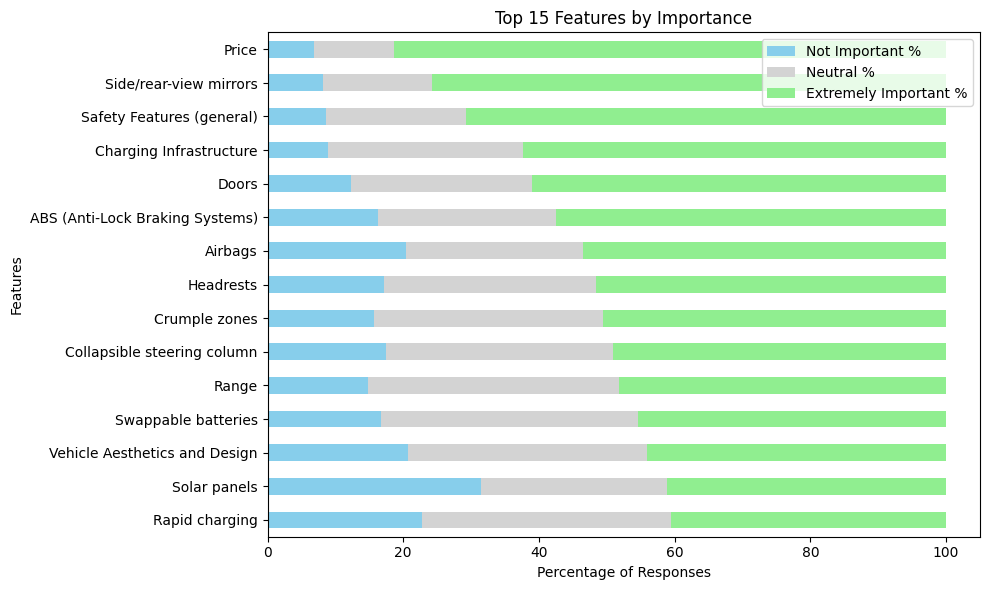

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

# Function to categorize the importance rankings into percentages
def calculate_percentages(df, column):
    categories = {
        'Not Important (1-3)': df[column].between(1, 3, inclusive='both').sum(),
        'Neutral (4-6)': df[column].between(4, 6, inclusive='both').sum(),
        'Extremely Important (7-9)': df[column].between(7, 9, inclusive='both').sum()
    }

    # Calculate the percentage for each category
    total_responses = categories['Not Important (1-3)'] + categories['Neutral (4-6)'] + categories['Extremely Important (7-9)']
    percentages = {k: (v / total_responses) * 100 for k, v in categories.items()}
    return percentages

# Function to create a stacked bar chart with percentages displayed
def plot_stacked_bar(df_ranked, title):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Reverse the order to have the most important features at the top
    df_ranked = df_ranked.iloc[::-1]
    
    # Plot the stacked bars
    df_ranked.set_index('Feature').plot(kind='barh', stacked=True, ax=ax, color=['skyblue', 'lightgray', 'lightgreen'])

    # Add title and labels
    plt.title(title)
    plt.xlabel('Percentage of Responses')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()

importance_columns_55 = {
    'Additional Heating': '55. How important do you rank the following features (1 = Not Important, 9 = Extremely Important) [Additional Heating]',
    'Air Conditioning': '55. How important do you rank the following features (1 = Not Important, 9 = Extremely Important) [Air Conditioning]',
    'Cargo / Passenger capacity': '55. How important do you rank the following features (1 = Not Important, 9 = Extremely Important) [Cargo / Passenger capacity]',
    'Price': '55. How important do you rank the following features (1 = Not Important, 9 = Extremely Important) [Price]',
    'Tailorable (seating/cargo changes)': '55. How important do you rank the following features (1 = Not Important, 9 = Extremely Important) [Tailorable (vehicle modifications made by the user) changes in seating and cargo space]',
    'Doors': '55. How important do you rank the following features (1 = Not Important, 9 = Extremely Important) [Doors]',
    'Charging Infrastructure': '55. How important do you rank the following features (1 = Not Important, 9 = Extremely Important) [Charging Infrastructure]',
    'Safety Features (general)': '55. How important do you rank the following features (1 = Not Important, 9 = Extremely Important) [Safety Features (in general)]',
    'Vehicle Aesthetics and Design': '55. How important do you rank the following features (1 = Not Important, 9 = Extremely Important) [Vehicle Aesthetics and Design]'
}

importance_columns_56 = {
    'Price': '56.  How important do you rank the following features (1 = Not Important, 9 = Extremely Important) [Price]',
    'Safety Features (general)': '56.  How important do you rank the following features (1 = Not Important, 9 = Extremely Important) [Safety features (in general)]',
    'Anti-theft features': '56.  How important do you rank the following features (1 = Not Important, 9 = Extremely Important) [Anti-theft features]',
    'Range': '56.  How important do you rank the following features (1 = Not Important, 9 = Extremely Important) [Range (cover longer distances without charging)]',
    'Rapid charging': '56.  How important do you rank the following features (1 = Not Important, 9 = Extremely Important) [Rapid charging]',
    'Swappable batteries': '56.  How important do you rank the following features (1 = Not Important, 9 = Extremely Important) [Swappable batteries for charging (lighter, ability to self-swap)]',
    'Comfort (space)': '56.  How important do you rank the following features (1 = Not Important, 9 = Extremely Important) [Comfort features - Space (legroom and headspace)]',
    'Comfort (noise shield)': '56.  How important do you rank the following features (1 = Not Important, 9 = Extremely Important) [Comfort Features – Acoustic (shield from noise)]',
    'Solar panels': '56.  How important do you rank the following features (1 = Not Important, 9 = Extremely Important) [Solar panels]'
}

importance_columns_57 = {
    'ABS (Anti-Lock Braking Systems)': '57.  How important do you rank the following safety features (1 = Not Important, 9 = Extremely Important) [Anti-Lock Braking Systems (ABS)]',
    'Backing up alarm': '57.  How important do you rank the following safety features (1 = Not Important, 9 = Extremely Important) [Driving in reverse / Backing up alarm]',
    'Headrests': '57.  How important do you rank the following safety features (1 = Not Important, 9 = Extremely Important) [Headrests]',
    'Side/rear-view mirrors': '57.  How important do you rank the following safety features (1 = Not Important, 9 = Extremely Important) [Side/rear-view mirrors]',
    'Airbags': '57.  How important do you rank the following safety features (1 = Not Important, 9 = Extremely Important) [Airbags]',
    'Crumple zones': '57.  How important do you rank the following safety features (1 = Not Important, 9 = Extremely Important) [Crumple zones]',
    'Collapsible steering column': '57.  How important do you rank the following safety features (1 = Not Important, 9 = Extremely Important) [Collapsable steering column]'
}



# Combine all the feature columns into one list for ranking
all_importance_columns = {**importance_columns_55, **importance_columns_56, **importance_columns_57}

def rank_features_by_importance(columns, df):
    """
    Ranks features by their importance based on the given columns in the dataframe.

    Args:
        columns (dict): A dictionary where keys are feature names and values are column names in the dataframe.
        df (DataFrame): The dataframe containing importance ratings.

    Returns:
        DataFrame: A dataframe with features ranked by the percentage of responses in each importance category.
    """
    rankings = []

    for feature, column in columns.items():
        # Ensure the column exists in the dataframe
        if column not in df:
            print(f"Warning: Column '{column}' not found in the dataframe.")
            continue

        # Calculate percentages for each importance category
        percentages = calculate_percentages(df, column)

        # Append results to the rankings list
        rankings.append({
            'Feature': feature,
            'Not Important %': percentages['Not Important (1-3)'],
            'Neutral %': percentages['Neutral (4-6)'],
            'Extremely Important %': percentages['Extremely Important (7-9)']
        })

    # Convert rankings to a DataFrame
    return pd.DataFrame(rankings)


# Rank the features
ranked_features = rank_features_by_importance(all_importance_columns, df)

# Define cutoffs for grouping the features
must_have_cutoff = 60  # Features with >60% Extremely Important are "Must Have"
neutral_cutoff = 20  # Features with 20-60% Extremely Important are "Neutral"

# Split the ranked features into the three groups based on cutoffs
must_have = ranked_features[ranked_features['Extremely Important %'] > must_have_cutoff]
neutral = ranked_features[(ranked_features['Extremely Important %'] <= must_have_cutoff) & (ranked_features['Extremely Important %'] > neutral_cutoff)]
dont_need = ranked_features[ranked_features['Extremely Important %'] <= neutral_cutoff]

# Sort the ranked features by the percentage of "Extremely Important"
ranked_features = ranked_features.sort_values(by='Extremely Important %', ascending=False)

# Select the top 15 features
top_15_features = ranked_features.head(15)

# Plot a single stacked bar chart for the top 15 features
plot_stacked_bar(top_15_features, 'Top 15 Features by Importance')

